In [656]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn import preprocessing

In [657]:
data=pd.read_csv('E:\AI\Exchange rate Proejct\data\Final_data (1federal).csv')
data.head()

,Dates,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP,Exchange Rate per day (USDPKR),Unnamed: 9,...,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,tradebalance(usd in millions),Credit (million USD),Debit(million USD),BOP(million USD),Unnamed: 43,Debt in Million US Dollars
0,1/1/2005,59.32,2145248,2730074,-26219.44,0.08,0.09,71955.16,160.17,160.47,...,160.05,160.34,160.19,159.63,NaN,NaN,NaN,NaN,NaN,"113,331"
1,2/1/2005,59.35,2146153,2758085,-79878.37,0.08,0.10,71985.49,159.46,159.39,...,159.85,160.11,160.47,0.00,"-1,949",5467.0,5020.0,447.0,NaN,"113,331"
2,3/1/2005,59.39,2147780,2812176,-88847.44,0.08,0.10,72040.07,160.45,160.45,...,164.53,164.96,164.94,165.07,"-1,792",5068.0,4653.0,415.0,NaN,"113,331"
3,4/1/2005,59.48,2106365,2830772,-765567.08,0.09,0.11,-9695.24,165.65,165.95,...,166.05,165.44,165.38,0.00,"-1,950",5016.0,4957.0,59.0,NaN,"113,803"
4,5/1/2005,59.56,2109021,2864430,-94871.12,0.09,0.10,-9707.47,165.48,167.43,...,167.60,167.01,167.50,167.63,"-1,829",4279.0,4068.0,211.0,NaN,"113,803"


In [658]:
data=data.iloc[:,0:8]
data.head()

,Dates,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP
0,1/1/2005,59.32,2145248,2730074,-26219.44,0.08,0.09,71955.16
1,2/1/2005,59.35,2146153,2758085,-79878.37,0.08,0.10,71985.49
2,3/1/2005,59.39,2147780,2812176,-88847.44,0.08,0.10,72040.07
3,4/1/2005,59.48,2106365,2830772,-765567.08,0.09,0.11,-9695.24
4,5/1/2005,59.56,2109021,2864430,-94871.12,0.09,0.10,-9707.47


In [659]:
data[pd.isnull(data).any(axis=1)]

,Dates,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP


In [660]:
data = data.set_index('Dates')
data.head()

,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP
Dates,,,,,,,
1/1/2005,59.32,2145248,2730074,-26219.44,0.08,0.09,71955.16
2/1/2005,59.35,2146153,2758085,-79878.37,0.08,0.10,71985.49
3/1/2005,59.39,2147780,2812176,-88847.44,0.08,0.10,72040.07
4/1/2005,59.48,2106365,2830772,-765567.08,0.09,0.11,-9695.24
5/1/2005,59.56,2109021,2864430,-94871.12,0.09,0.10,-9707.47


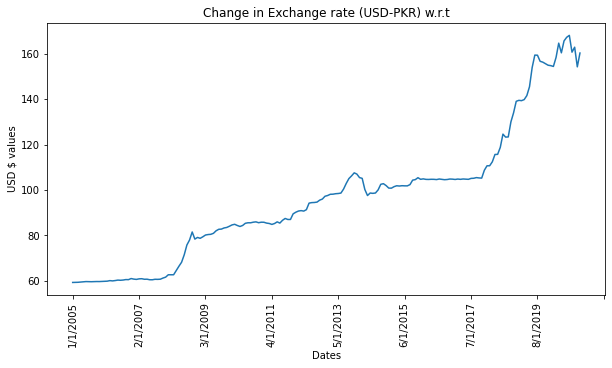

In [661]:

plt.figure(figsize=(10,5))
#ax4.plot(x + 2, -y**2, 'tab:red')
data.USDPKR.plot()
plt.xticks(rotation ='vertical')
plt.ylabel('USD $ values')
plt.title('Change in Exchange rate (USD-PKR) w.r.t')
plt.show()

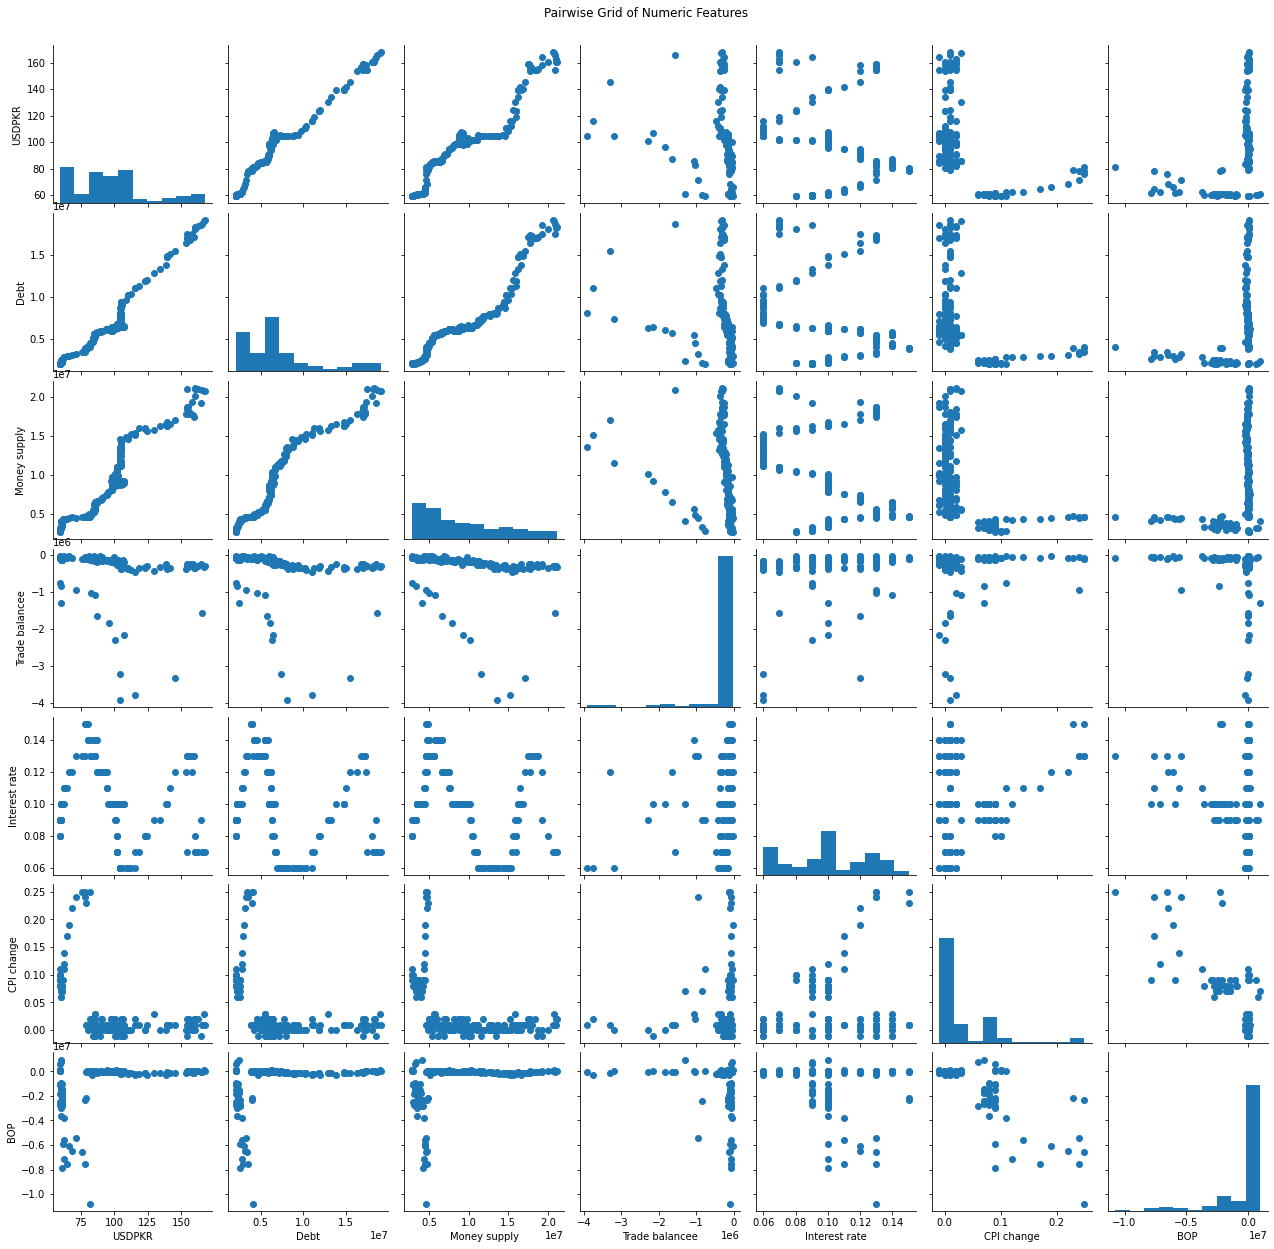

In [662]:
g = sns.PairGrid(data)
g.map_diag(plt.hist)
g.map_offdiag(plt.scatter)
plt.subplots_adjust(top=0.95)
g.fig.suptitle('Pairwise Grid of Numeric Features');

Text(0.5, 1.0, 'Correlation Heatmap of Numeric Features')

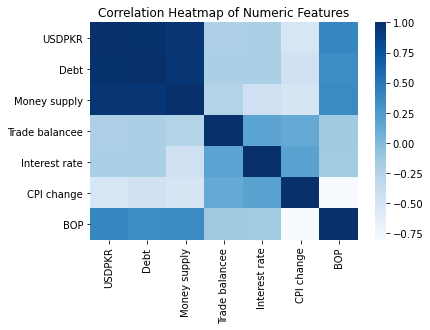

In [663]:
corr = data.corr() 
corr 
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, cmap='Blues') 
plt.title('Correlation Heatmap of Numeric Features')

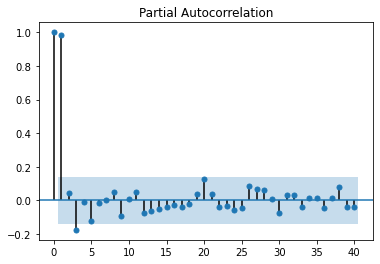

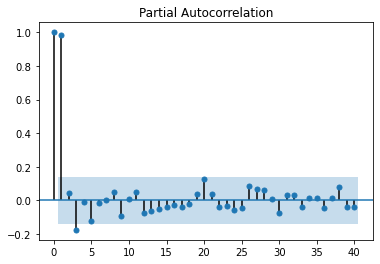

In [664]:
import statsmodels.api as sm
sm.graphics.tsa.plot_pacf(data['USDPKR'], lags=40)

In [665]:
features = ['USDPKR', 'Debt','Money supply','Trade balancee','Interest rate','CPI change','BOP']
def feature_lag(features):
    for feature in features:
        data[feature + '-lag1'] = data[feature].shift(1)
feature_lag(features)
data.head()

,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP,USDPKR-lag1,Debt-lag1,Money supply-lag1,Trade balancee-lag1,Interest rate-lag1,CPI change-lag1,BOP-lag1
Dates,,,,,,,,,,,,,,
1/1/2005,59.32,2145248,2730074,-26219.44,0.08,0.09,71955.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2/1/2005,59.35,2146153,2758085,-79878.37,0.08,0.10,71985.49,59.32,2145248.0,2730074.0,-26219.44,0.08,0.09,71955.16
3/1/2005,59.39,2147780,2812176,-88847.44,0.08,0.10,72040.07,59.35,2146153.0,2758085.0,-79878.37,0.08,0.10,71985.49
4/1/2005,59.48,2106365,2830772,-765567.08,0.09,0.11,-9695.24,59.39,2147780.0,2812176.0,-88847.44,0.08,0.10,72040.07
5/1/2005,59.56,2109021,2864430,-94871.12,0.09,0.10,-9707.47,59.48,2106365.0,2830772.0,-765567.08,0.09,0.11,-9695.24


In [666]:

data['date'] = data.index
data['date'] = pd.to_datetime(data.date)

import datetime as dt
data['month'] = data['date'].dt.month
data['year'] = data['date'].dt.year


data.drop(labels='date', axis=1, inplace=True)
data.head()

,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP,USDPKR-lag1,Debt-lag1,Money supply-lag1,Trade balancee-lag1,Interest rate-lag1,CPI change-lag1,BOP-lag1,month,year
Dates,,,,,,,,,,,,,,,,
1/1/2005,59.32,2145248,2730074,-26219.44,0.08,0.09,71955.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2005
2/1/2005,59.35,2146153,2758085,-79878.37,0.08,0.10,71985.49,59.32,2145248.0,2730074.0,-26219.44,0.08,0.09,71955.16,2,2005
3/1/2005,59.39,2147780,2812176,-88847.44,0.08,0.10,72040.07,59.35,2146153.0,2758085.0,-79878.37,0.08,0.10,71985.49,3,2005
4/1/2005,59.48,2106365,2830772,-765567.08,0.09,0.11,-9695.24,59.39,2147780.0,2812176.0,-88847.44,0.08,0.10,72040.07,4,2005
5/1/2005,59.56,2109021,2864430,-94871.12,0.09,0.10,-9707.47,59.48,2106365.0,2830772.0,-765567.08,0.09,0.11,-9695.24,5,2005


In [667]:
data['USDPKR-lag1-diff'] = data['USDPKR'] - data['USDPKR-lag1']
data.head()

,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP,USDPKR-lag1,Debt-lag1,Money supply-lag1,Trade balancee-lag1,Interest rate-lag1,CPI change-lag1,BOP-lag1,month,year,USDPKR-lag1-diff
Dates,,,,,,,,,,,,,,,,,
1/1/2005,59.32,2145248,2730074,-26219.44,0.08,0.09,71955.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2005,NaN
2/1/2005,59.35,2146153,2758085,-79878.37,0.08,0.10,71985.49,59.32,2145248.0,2730074.0,-26219.44,0.08,0.09,71955.16,2,2005,0.03
3/1/2005,59.39,2147780,2812176,-88847.44,0.08,0.10,72040.07,59.35,2146153.0,2758085.0,-79878.37,0.08,0.10,71985.49,3,2005,0.04
4/1/2005,59.48,2106365,2830772,-765567.08,0.09,0.11,-9695.24,59.39,2147780.0,2812176.0,-88847.44,0.08,0.10,72040.07,4,2005,0.09
5/1/2005,59.56,2109021,2864430,-94871.12,0.09,0.10,-9707.47,59.48,2106365.0,2830772.0,-765567.08,0.09,0.11,-9695.24,5,2005,0.08


In [668]:
data['y1'] = data.USDPKR.shift(-1)
data.head()

,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP,USDPKR-lag1,Debt-lag1,Money supply-lag1,Trade balancee-lag1,Interest rate-lag1,CPI change-lag1,BOP-lag1,month,year,USDPKR-lag1-diff,y1
Dates,,,,,,,,,,,,,,,,,,
1/1/2005,59.32,2145248,2730074,-26219.44,0.08,0.09,71955.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2005,NaN,59.35
2/1/2005,59.35,2146153,2758085,-79878.37,0.08,0.10,71985.49,59.32,2145248.0,2730074.0,-26219.44,0.08,0.09,71955.16,2,2005,0.03,59.39
3/1/2005,59.39,2147780,2812176,-88847.44,0.08,0.10,72040.07,59.35,2146153.0,2758085.0,-79878.37,0.08,0.10,71985.49,3,2005,0.04,59.48
4/1/2005,59.48,2106365,2830772,-765567.08,0.09,0.11,-9695.24,59.39,2147780.0,2812176.0,-88847.44,0.08,0.10,72040.07,4,2005,0.09,59.56
5/1/2005,59.56,2109021,2864430,-94871.12,0.09,0.10,-9707.47,59.48,2106365.0,2830772.0,-765567.08,0.09,0.11,-9695.24,5,2005,0.08,59.70


In [669]:
data[pd.isnull(data).any(axis=1)]

,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP,USDPKR-lag1,Debt-lag1,Money supply-lag1,Trade balancee-lag1,Interest rate-lag1,CPI change-lag1,BOP-lag1,month,year,USDPKR-lag1-diff,y1
Dates,,,,,,,,,,,,,,,,,,
1/1/2005,59.32,2145248,2730074,-26219.44,0.08,0.09,71955.16,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,2005,NaN,59.35
12/1/2020,160.28,18164613,21031144,-301885.00,0.07,0.01,68256.72,154.2,17475563.0,20954200.0,-300543.0,0.07,0.01,68929.03,12,2020,6.08,NaN


In [670]:
data=data.fillna(0)
data.head()

,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP,USDPKR-lag1,Debt-lag1,Money supply-lag1,Trade balancee-lag1,Interest rate-lag1,CPI change-lag1,BOP-lag1,month,year,USDPKR-lag1-diff,y1
Dates,,,,,,,,,,,,,,,,,,
1/1/2005,59.32,2145248,2730074,-26219.44,0.08,0.09,71955.16,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1,2005,0.00,59.35
2/1/2005,59.35,2146153,2758085,-79878.37,0.08,0.10,71985.49,59.32,2145248.0,2730074.0,-26219.44,0.08,0.09,71955.16,2,2005,0.03,59.39
3/1/2005,59.39,2147780,2812176,-88847.44,0.08,0.10,72040.07,59.35,2146153.0,2758085.0,-79878.37,0.08,0.10,71985.49,3,2005,0.04,59.48
4/1/2005,59.48,2106365,2830772,-765567.08,0.09,0.11,-9695.24,59.39,2147780.0,2812176.0,-88847.44,0.08,0.10,72040.07,4,2005,0.09,59.56
5/1/2005,59.56,2109021,2864430,-94871.12,0.09,0.10,-9707.47,59.48,2106365.0,2830772.0,-765567.08,0.09,0.11,-9695.24,5,2005,0.08,59.70


In [671]:
y = data.y1.copy()
X = data.drop(['y1'], axis=1)

In [672]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.20, random_state=1)

In [673]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression()

In [674]:
y_pred=regressor.predict(X_test)

In [719]:
co_eff=pd.DataFrame(regressor.coef_,X.columns,columns=['Coeffiecient'])
co_eff

,Coeffiecient
USDPKR,3.289490e-01
Debt,4.612781e-06
Money supply,3.826074e-06
Trade balancee,-9.011479e-07
Interest rate,1.350306e+01
CPI change,3.737435e+01
BOP,-5.390130e-07
USDPKR-lag1,4.219035e-01
Debt-lag1,-2.481820e-06
Money supply-lag1,-8.524713e-06


In [720]:
print('Intercept= ',regressor.intercept_)

Intercept=  -9177.660990223907


In [721]:
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df.head()

,Actual,Predicted
Dates,,
9/1/2008,81.53,81.625505
10/1/2010,85.61,90.442893
6/1/2018,124.59,114.034568
12/1/2007,62.70,56.352740
3/1/2020,164.63,147.738736


In [725]:
from sklearn.metrics import mean_absolute_error
import sklearn.metrics as sm
print('Mean Absolute Error: ',mean_absolute_error(y_test, y_pred))
#print('Regressor score:', regressor.score(y_test, y_pred))
print("R2 score =", round(sm.r2_score(y_test, y_pred), 2))


Mean Absolute Error:  4.7616063598840705
R2 score = 0.96


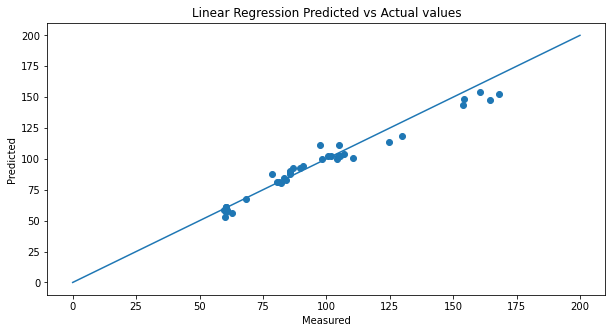

In [690]:
plt.figure(figsize=(10,5))
plt.plot( [0,200],[0,200] )
plt.scatter(y_test, y_pred)
plt.xlabel('Measured')
plt.ylabel('Predicted')
plt.title('Linear Regression Predicted vs Actual values')
plt.show()

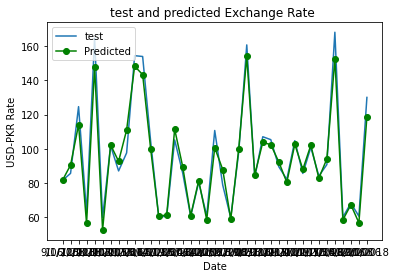

In [693]:

#plt.figure(figsize=(20,20))
#plt.xticks(rotation ='vertical')
plt.fig, ax = plt.subplots()
ax.plot(df.index, df['Actual'])
ax.plot(df.index, df['Predicted'], color='green',marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('USD-PKR Rate')
ax.set_title("test and predicted Exchange Rate ")
ax.legend(labels=['test', 'Predicted'])

In [699]:
data.head()

,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP,USDPKR-lag1,Debt-lag1,Money supply-lag1,Trade balancee-lag1,Interest rate-lag1,CPI change-lag1,BOP-lag1,month,year,USDPKR-lag1-diff,y1
Dates,,,,,,,,,,,,,,,,,,
1/1/2005,59.32,2145248,2730074,-26219.44,0.08,0.09,71955.16,0.00,0.0,0.0,0.00,0.00,0.00,0.00,1,2005,0.00,59.35
2/1/2005,59.35,2146153,2758085,-79878.37,0.08,0.10,71985.49,59.32,2145248.0,2730074.0,-26219.44,0.08,0.09,71955.16,2,2005,0.03,59.39
3/1/2005,59.39,2147780,2812176,-88847.44,0.08,0.10,72040.07,59.35,2146153.0,2758085.0,-79878.37,0.08,0.10,71985.49,3,2005,0.04,59.48
4/1/2005,59.48,2106365,2830772,-765567.08,0.09,0.11,-9695.24,59.39,2147780.0,2812176.0,-88847.44,0.08,0.10,72040.07,4,2005,0.09,59.56
5/1/2005,59.56,2109021,2864430,-94871.12,0.09,0.10,-9707.47,59.48,2106365.0,2830772.0,-765567.08,0.09,0.11,-9695.24,5,2005,0.08,59.70


In [700]:
usd = pd.DataFrame(data.index)
usd['Dates'] = pd.to_datetime(usd.Dates)
usd = usd.set_index('Dates', drop=False)
usd['USDPKR'] = data['USDPKR']
usd.head()

,Dates,USDPKR
Dates,,
2005-01-01,2005-01-01,59.32
2005-02-01,2005-02-01,59.35
2005-03-01,2005-03-01,59.39
2005-04-01,2005-04-01,59.48
2005-05-01,2005-05-01,59.56


In [701]:
test = pd.DataFrame(y_test.index)
test['Dates'] = pd.to_datetime(test.Dates)
test = test.set_index('Dates', drop=False)
test['y_predict'] = df.loc[:,'Predicted']
test.head()
#y_test

,Dates,y_predict
Dates,,
2008-09-01,2008-09-01,81.625505
2010-10-01,2010-10-01,90.442893
2018-06-01,2018-06-01,114.034568
2007-12-01,2007-12-01,56.352740
2020-03-01,2020-03-01,147.738736


In [702]:
usd = usd.merge(test, how='left', left_index=True, right_index=True)
usd

,Dates_x,USDPKR,Dates_y,y_predict
Dates,,,,
2005-01-01,2005-01-01,59.32,NaT,NaN
2005-02-01,2005-02-01,59.35,NaT,NaN
2005-03-01,2005-03-01,59.39,NaT,NaN
2005-04-01,2005-04-01,59.48,NaT,NaN
2005-05-01,2005-05-01,59.56,2005-05-01,58.762510
...,...,...,...,...
2020-08-01,2020-08-01,168.06,2020-08-01,153.955861
2020-09-01,2020-09-01,160.66,NaT,NaN
2020-10-01,2020-10-01,162.85,NaT,NaN


<Figure size 720x1440 with 0 Axes>

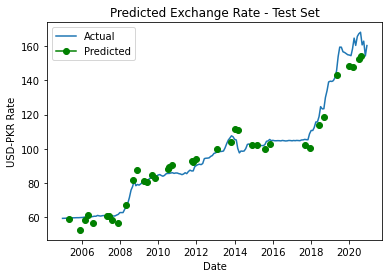

In [703]:
plt.figure(figsize=(10,20))
fig, ax = plt.subplots()
ax.plot(usd.index, usd['USDPKR'])
ax.plot(usd.index, usd['y_predict'], color='green',marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('USD-PKR Rate')
ax.set_title("Predicted Exchange Rate - Test Set")
ax.legend(labels=['Actual', 'Predicted'])

In [704]:
forecast=pd.read_csv(r'E:\AI\Exchange rate Proejct\data\New Microsoft Excel Worksheet.csv')
forecast

,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP,USDPKR-lag1,Debt-lag1,Money supply-lag1,Trade balancee-lag1,Interest rate-lag1,CPI change-lag1,BOP-lag1,USDPKR-lag1-diff
0,160.28,18164613,21031144,-301885,0.07,0.01,68256.72,154.2,17475563,20954200,-300543,0.07,0.01,68929.03,6.08


In [705]:
forecast['Dates']='2020/12/01'

In [706]:
forecast['Dates']=pd.to_datetime(forecast.Dates)

In [707]:
forecast = forecast.set_index('Dates')
forecast

,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP,USDPKR-lag1,Debt-lag1,Money supply-lag1,Trade balancee-lag1,Interest rate-lag1,CPI change-lag1,BOP-lag1,USDPKR-lag1-diff
Dates,,,,,,,,,,,,,,,
2020-12-01,160.28,18164613,21031144,-301885,0.07,0.01,68256.72,154.2,17475563,20954200,-300543,0.07,0.01,68929.03,6.08


In [708]:
forecast['date'] = forecast.index
forecast['date'] = pd.to_datetime(forecast.date)

import datetime as dt
forecast['month'] = forecast['date'].dt.month
forecast['year'] = forecast['date'].dt.year


forecast.drop(labels='date', axis=1, inplace=True)
forecast.head()

,USDPKR,Debt,Money supply,Trade balancee,Interest rate,CPI change,BOP,USDPKR-lag1,Debt-lag1,Money supply-lag1,Trade balancee-lag1,Interest rate-lag1,CPI change-lag1,BOP-lag1,USDPKR-lag1-diff,month,year
Dates,,,,,,,,,,,,,,,,,
2020-12-01,160.28,18164613,21031144,-301885,0.07,0.01,68256.72,154.2,17475563,20954200,-300543,0.07,0.01,68929.03,6.08,12,2020


In [709]:
forecast_value=regressor.predict(forecast)
forecast_value

array([-12077.13041596])

In [710]:

forecast_value = pd.DataFrame(forecast_value)
forecast_value

,0
0,-12077.130416


In [711]:
forecast_value['Dates']='2021/01/01'
forecast_value

,0,Dates
0,-12077.130416,2021/01/01


In [712]:
forecast_value['Dates']=pd.to_datetime(forecast_value.Dates)


In [713]:
forecast_value = forecast_value.set_index('Dates')
forecast_value

,0
Dates,
2021-01-01,-12077.130416


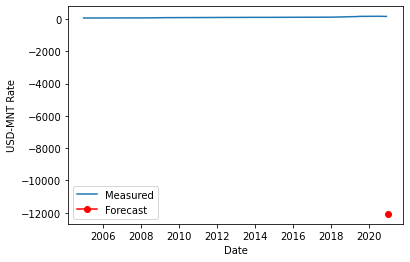

In [714]:
fig, ax = plt.subplots()
ax.plot(usd.index, usd['USDPKR'])
ax.plot(forecast_value.index, forecast_value[0], color='red',marker='o')
ax.set_xlabel('Date')
ax.set_ylabel('USD-MNT Rate')
ax.legend(labels=['Measured', 'Forecast'])